# A Symbolic Representation of Time Series, with Implications for Streaming Algorithms

## Introduction

The Symbolic Aggregate approXimation (SAX) is a data transformation technique used to represent time series data using discrete symbols. This algorithm converts continuous time series into a sequence of symbols, allowing for more efficient analysis and comparison of time series patterns. SAX breaks down a time series into segments, calculates their averages, and assigns symbols based on predefined breakpoints. These symbols capture the overall trends and patterns in the original time series while reducing the dimensionality of the data. SAX has applications in various fields, including data mining, pattern recognition, and similarity-based search, making it a valuable tool for handling and understanding time series data.

## The algorithm

SAX is a technique that converts continuous time series data into a sequence of discrete symbols, which capture the essential characteristics of the original data while reducing its dimensionality. The algorithm involves several key steps:

1. PAA (Piecewise Aggregate Approximation): The time series is divided into non-overlapping segments, and the average value of each segment is calculated. This step reduces the temporal resolution of the data while retaining its general trends.

2. Normalization: The PAA-transformed data is normalized to have a zero mean and unit variance. This ensures that the data is centered around zero and scaled appropriately.

3. Alphabet Construction: An alphabet of symbols is created based on predefined breakpoints. These breakpoints divide the normalized data range into intervals, each associated with a unique symbol. Commonly used alphabets include 'a', 'b', 'c', and 'd'.

4. Symbol Assignment: Each normalized PAA segment is assigned a symbol from the alphabet based on its value. For example, if the segment's value falls within a certain interval, it is assigned the corresponding symbol.

5. SAX Sequence: The sequence of symbols obtained from symbol assignment represents the original time series in a compact form. This sequence can be used for pattern matching, similarity analysis, and other tasks.



## Timeseries Data

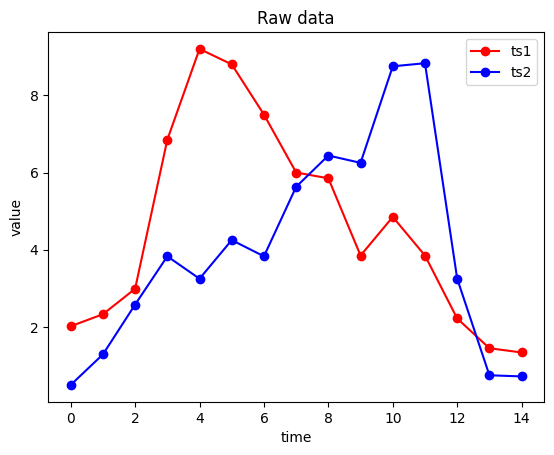

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ts1= np.array([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])
ts2= np.array([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72])

x = list(range(len(ts1)))

plt.plot(x,ts1,'ro-', label = 'ts1')
plt.plot(x,ts2,'bo-', label = 'ts2')
plt.title('Raw data')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

In [2]:
eucl_dist = np.sqrt(np.sum((ts1 - ts2)**2))
print(f'The euclidian distance between ts1 and ts2 is {eucl_dist}')

The euclidian distance between ts1 and ts2 is 11.421256498301753


## Standardization or Z-score normalization

Z-normalization, also known as standardization or z-score normalization, is a data preprocessing technique used to transform a dataset so that it has a mean of zero and a standard deviation of one. This process is often applied to individual features or variables within the dataset. Z-normalization is commonly used in various fields, including statistics, machine learning, and data analysis, to bring data onto a common scale and mitigate the impact of different scales among variables.

The formula for calculating the z-score of a data point x in a dataset with mean μ and standard deviation σ is given by:

>## <center>$z = \frac{x - \mu}{\sigma}$</center>

In [3]:
znorm = lambda x: (x - np.mean(x))/ np.std(x)

ts1_znorm=znorm(ts1)
ts2_znorm=znorm(ts2)

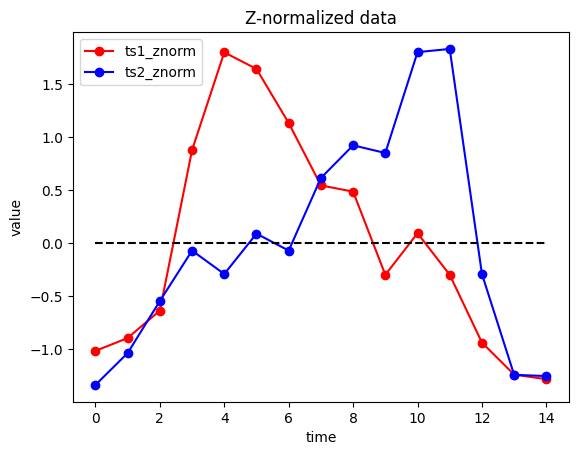

In [4]:
plt.plot(x,ts1_znorm,'ro-', label = 'ts1_znorm')
plt.plot(x,ts2_znorm,'bo-', label = 'ts2_znorm')
plt.plot(x,np.zeros(len(x)), 'k--')
plt.title('Z-normalized data')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

## PAA transform

Piecewise Aggregate Approximation (PAA) transformation is a technique used in time series analysis to reduce the amount of data and simplify analysis without losing too much important information. PAA divides a time series into segments or intervals and then calculates the average value within each segment. This creates a more compact representation of the original time series.

In [5]:
from helper_functions import paa, sax, sax_distance, MINDIST

In [6]:
paa_size = 9
s1_paa = paa(ts1_znorm, paa_size)
s2_paa = paa(ts2_znorm, paa_size)

In [7]:
x_paa = np.linspace(0,14, 10)

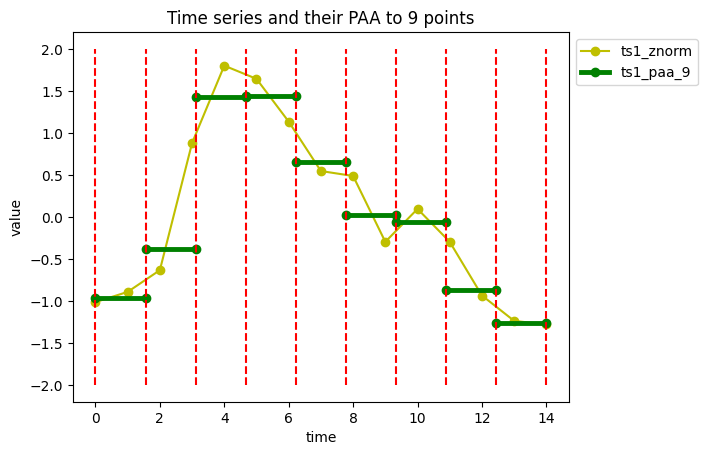

In [8]:
legend_labels = ['ts1_znorm', 'ts1_paa_9']

plt.plot(x,ts1_znorm,'yo-', label = 'ts1_znorm')
for i in range(paa_size):
    plt.plot([x_paa[i], x_paa[i+1]],[s1_paa[i], s1_paa[i]], 'go-', linewidth = 3.5)
    plt.plot([x_paa[i], x_paa[i]],[-2, 2], 'r--')
plt.plot([x_paa[-1], x_paa[-1]],[-2, 2], 'r--')
plt.title('Time series and their PAA to 9 points')
plt.xlabel('time')
plt.ylabel('value')
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

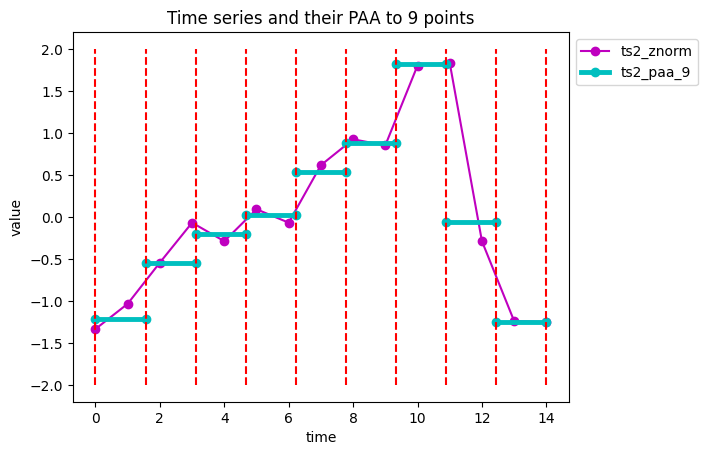

In [9]:
legend_labels = ['ts2_znorm', 'ts2_paa_9']

plt.plot(x,ts2_znorm,'mo-', label = 'ts2_znorm')
for i in range(paa_size):
    plt.plot([x_paa[i], x_paa[i+1]],[s2_paa[i], s2_paa[i]], 'co-', linewidth = 3.5)
    plt.plot([x_paa[i], x_paa[i]],[-2, 2], 'r--')
plt.plot([x_paa[-1], x_paa[-1]],[-2, 2], 'r--')
plt.title('Time series and their PAA to 9 points')
plt.xlabel('time')
plt.ylabel('value')
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
alphabet_size = 4

ts1_SAX = sax(s1_paa, alphabet_size)
ts2_SAX = sax(s2_paa, alphabet_size)

In [11]:
print(f'SAX transform of ts1 into string through 9-points PAA: “{ts1_SAX}"')
print(f'SAX transform of ts2 into string through 9-points PAA: “{ts2_SAX}"')

SAX transform of ts1 into string through 9-points PAA: “abddccbaa"
SAX transform of ts2 into string through 9-points PAA: “abbccddba"


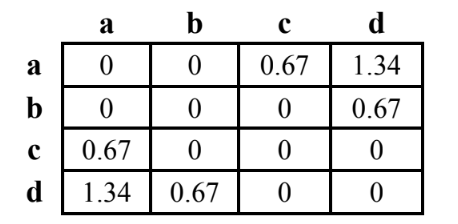

In [12]:
from IPython.display import Image, display

# Ruta de la imagen
image_path = 'look_up_table.png'

# Mostrar la imagen
display(Image(filename=image_path))

In [13]:
dist = sax_distance(ts1_SAX, ts2_SAX)       

In [14]:
print(f'Sax distance: {dist} = {np.sum(dist)}')

Sax distance: [0.   0.   0.67 0.   0.   0.   0.67 0.   0.  ] = 1.34


In [15]:
mindist_func = MINDIST(dist, 15, 9)
print(f'minimum distance between the original time series of two words: {mindist_func}')

minimum distance between the original time series of two words: 1.2232470450948711
